__ISIS3301 - Inteligencia de Negocios__

<div align="center">

## **Proyecto 1: Procesamiento de Textos**
## **Etapa 1**
-------------------------------------

</div>

*   *Julián Castro - 202020847*
*   *Alejandro Gómez - 202015122*
*   *Jonathan Rivera -2020228643*


### **Caso**

El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y
Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar,
Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están
interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual
manera, quieren comparar las características de dichos sitios, con aquellos que han
obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a
ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que
tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar
oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el
turismo.
Esos actores de turismo prepararon dos conjuntos de datos con reseñas de sitios turísticos.
Cada reseña tiene una calificación según el sentimiento que tuvo el turista al visitarlo. Estos
actores quieren lograr un análisis independiente de los conjuntos de datos y al final del
proyecto discutir sobre los grupos de científicos de datos e ingenieros de datos que
acompañarán el desarrollo real de este proyecto.

### **Objetivos**

Plantear un modelo de prediccion de calificaiciones de reseñas, basado en el procesamiento de textos, con un algoritmo que identifique la relacion semantica entre palabras y las calificaciones numericas

In [1]:
%pip install nltk
%pip install openpyxl
%pip install contractions
%pip install inflect
%pip install spacy
%pip install gensim
%pip install scikit-optimize
!python -m spacy download es_core_news_md
%pip install inflect
%pip install scikit-plot
%pip install spacy-language-detection
%pip install -U pip setuptools wheel
%pip install -U spacy
! python -m spacy download en_core_web_sm
! pip install langdetect
%pip install num2words

Note: you may need to restart the kernel to use updated packages.

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Instalación de librerias

__¿Qué es Punkt?:__

Este tokenizador divide un texto en una lista de oraciones mediante el uso de un algoritmo no supervisado para construir un modelo para abreviaturas, colocaciones y palabras que comienzan oraciones.

__¿Qué son Stopwords?:__

En el procesamiento del lenguaje natural (PNL) , las palabras vacías se filtran con frecuencia para mejorar el análisis de texto y la eficiencia computacional. La eliminación de palabras vacías puede mejorar la precisión y relevancia de las tareas de PNL al llamar la atención sobre las palabras más importantes o palabras de contenido.

Se cree que ciertas palabras, como “the”, “a”, “an”, o “in”, no son efectivas para comunicar información importante. El objetivo de eliminar palabras que aportan poco o nada a la comprensión del texto es acelerar el procesamiento del texto, aunque la lista de palabras vacías pueda diferir.

__¿Qué es WordNet?:__

Wordnet es un lector de corpus NLTK, una base de datos léxica para inglés. Se puede utilizar para encontrar el significado de palabras, sinónimos o antónimos. Se puede definir como un diccionario de inglés orientado semánticamente.

In [1]:
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("averaged_perceptron_tagger") 


[nltk_data] Downloading package punkt to C:\Users\JHONATAN
[nltk_data]     RIVERA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\JHONATAN
[nltk_data]     RIVERA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\JHONATAN
[nltk_data]     RIVERA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JHONATAN RIVERA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
)

from sklearn.linear_model import LogisticRegression


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

"c:\Users\JHONATAN" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


--------------------------------
# **1. Perfilamiento y Entendimiento de los datos**
--------------------------------

In [3]:
data=pd.read_csv('tipo2_entrenamiento_estudiantes.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data

In [4]:
data.head()

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3


Los datos que tenemos se presentan de una manera muy simple, una columna con las reseñas en lenguaje natural, y otra columna con la calificación numerica de las reseñas

--------------------------------
### **1.1 Idioma de los datos**
--------------------------------

Para el planteamiento de un modelo que analice textos, es esencial primero conocer el idioma en el que se encuentran los textos, esto porque tanto para la transformación de los textos (lematización, tokenización) para poder ser procesado por el modelo, como para configurar el modelo, es necesario que se tenga un lenguaje comun para todos los tokens

In [5]:
#Podemos usar la libreria langdetect para conocer el idioma de todos los textos, y podemos aprovecharnos de las funcionalidades 
# de pandas para facilmente agregar una columna con el idioma del texto para su posterior analizis
from langdetect import detect
data_t['idioma'] = data_t['Review'].apply(detect)
data_t

,Review,Class,idioma
0,Muy buena atención y aclaración de dudas por p...,5,es
1,Buen hotel si están obligados a estar cerca de...,3,es
2,"Es un lugar muy lindo para fotografías, visite...",5,es
3,Abusados con la factura de alimentos siempre s...,3,es
4,Tuvimos un par de personas en el grupo que rea...,3,es
...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,es
7871,"Fue una escapada de un día desde el complejo, ...",4,es
7872,La Plaza de la Revolución es un lugar emblemát...,3,es
7873,Es la segunda ocasión que me quedo en los cuar...,1,es


In [6]:
#Podemos realizar el conteo de los valores en la columna idioma para entender la proporcion linguistica de las reseñas
data_t['idioma'].value_counts()

idioma
es    7867
en       3
pt       2
it       2
sq       1
Name: count, dtype: int64

Como podemos virtualmente todas las reseñas se encuentran en español, con tan solo 8 reseñas de 7874 perteneciendo a otro idioma.
Como mencionabamos previamente, el modelo tiene que plantarse para un solo idioma, por lo que sera necesario remover las reseñas de otros idiomas en la fase de transformación de los datos

--------------------------------
### **1.2 Entendimiento de los ratings**
--------------------------------

Entender y analizar la distribución de los datos de los rating puede ayudarnos a contribuir cualitativamente los objetivos de negocios

In [7]:
data_t.describe()

,Class
count,7875.000000
mean,3.502603
std,1.320435
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


A partir de las estadisticas de los ratings de las reseñas podemos entender lo siguiente:
* No hay ratings invalidos dado que el maximo y el minimo se encuentran en una escala logica y consistente (1-5)
* En promedio las reseñas tienen una calificación de 3.5, por lo que puede ser evidencia de que se tiene una distribución apropiada de calificaciones (no estan sesgadas a ningun extremo).
* Lo anterior se puede confirmar observando la distribución de los datos en los cuartiles. El 25% de los ratings tienen una calificación maxima de 3, el 50% de 4, y el 75% de 5.
* Tenemos 7875 reseñas para la creación del modelo y su posterior validación. 

### 1.3 Calidad de los datos

#### 1.3.1 Completitud

In [8]:
((data_t.isnull().sum()/data_t.shape[0])).sort_values(ascending=False)

Review    0.0
Class     0.0
idioma    0.0
dtype: float64

Podemos observar que no tenemos valores nulos en nuestros datos, por lo tanto no sera necesario hacer un analizis de manejo de nulalidad

#### 1.3.2 Unicidad

In [9]:
data_t.duplicated(keep = False).sum()

102

Podemos observar que tenemos 102 registros duplicados, debido a que los duplicados no añaden valor alguno al modelo, pero si pueden introducir un sesgo (debido a que ciertas palabras pueden asosiarse de manera mas fuerte a un rating de manera erronea), tendremos que eliminarlos en la fase de limpieza de datos.

#### 1.3.3 Consistencia

Como veiamos previamente en el entendimiento de los ratings, estos datos son consistentes dado que todas las calificaciones se encuentran en un rango coherente y logico de (1-5)

#### 1.3.4 Validez

Debido a que no existe una relación cuantificable entre las columnas, no tiene cabida un analisis de validez de las relaciones entre columnas

--------------------------------
# **2. Preparación de los Datos**
--------------------------------

#### 2.1 Limpieza de los datos 

#### 2.1.1 Quitar duplicados

In [10]:
data_t= data_t.drop_duplicates()
data_t.duplicated(keep = False).sum()

0

Como mencionamos previamente, tenemos que deshacernos de los duplicados antes de alimentar el modelo con los datos. Observamos que el dataframe queda sin datos duplicados

#### 2.1.2 Quitar reseñas en otros idiomas

In [11]:
data_t= data_t[data_t.idioma == 'es']
data_t['idioma'].value_counts()

idioma
es    7794
Name: count, dtype: int64

Como se menciono en el entendimiento de datos, nos vamos a quedar con solo las reseñas que esten en español. Podemos observar que el dataframe ahora solo contiene reseñas en español

#### 2.1.3 Transformar los datos

In [12]:
from num2words import num2words
stop_words = stopwords.words("spanish")

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation in Spanish"""
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    stop_words = set(stopwords.words("spanish"))
    new_words = [word for word in words if word not in stop_words]
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


En este apartado estamos creando codigo para limpiar y preprocesar el texto tokenizado, lo que ayuda a mejorar la calidad de los datos antes de alimentarlos al modelo de predicción de calificaciones. Al eliminar información no relevante y estandarizar el texto, se espera que el modelo pueda aprender patrones más significativos y precisos para hacer predicciones más efectivas. Sin embargo, es necesario tokenizar primero las reviews para poder aplicar la limpieza

--------------------------------
### **2.2 Tokenización**
--------------------------------

La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Es usual que en tareas de NLP se transformen las contracciones en los textos procesados, sin embargo dado que para la tarea ejecutada el texto se encuentra en español, donde las contracciones no son tan comunes y se utilizan mayoritariamente en 'stopwords' no sera necesario aplicar este paso.

In [13]:
data_t['words'] = data_t['Review'].apply(word_tokenize)
data_t.head()

,Review,Class,idioma,words
0,Muy buena atención y aclaración de dudas por p...,5,es,"[Muy, buena, atención, y, aclaración, de, duda..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[Buen, hotel, si, están, obligados, a, estar, ..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[Es, un, lugar, muy, lindo, para, fotografías,..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[Abusados, con, la, factura, de, alimentos, si..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[Tuvimos, un, par, de, personas, en, el, grupo..."


In [14]:
data_t['words1']=data_t['words'].apply(preprocessing)
data_t.head(10)

,Review,Class,idioma,words,words1
0,Muy buena atención y aclaración de dudas por p...,5,es,"[Muy, buena, atención, y, aclaración, de, duda...","[buena, atencion, aclaracion, dudas, parte, se..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[Buen, hotel, si, están, obligados, a, estar, ...","[buen, hotel, si, estan, obligados, cerca, cen..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[Es, un, lugar, muy, lindo, para, fotografías,...","[lugar, lindo, fotografias, visiten, selina, m..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[Abusados, con, la, factura, de, alimentos, si...","[abusados, factura, alimentos, siempre, echan,..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[Tuvimos, un, par, de, personas, en, el, grupo...","[par, personas, grupo, realmente, queriamos, c..."
5,Un complejo enorme de fortificaciones frente a...,4,es,"[Un, complejo, enorme, de, fortificaciones, fr...","[complejo, enorme, fortificaciones, frente, an..."
6,Acabo de volver de Cuba. La primera semana en ...,2,es,"[Acabo, de, volver, de, Cuba, ., La, primera, ...","[acabo, volver, cuba, primera, semana, tryp, h..."
7,"Hola, estuve 4 noches 5 días, en este hotel, l...",3,es,"[Hola, ,, estuve, 4, noches, 5, días, ,, en, e...","[hola, cuatro, noches, cinco, dias, hotel, lue..."
8,"Antes de salir de viaje, escuché opiniones neg...",5,es,"[Antes, de, salir, de, viaje, ,, escuché, opin...","[salir, viaje, escuche, opiniones, negativas, ..."
9,Es imposible pasar por Monterrey y no subir. L...,3,es,"[Es, imposible, pasar, por, Monterrey, y, no, ...","[imposible, pasar, monterrey, subir, vistas, e..."


In [15]:
data_t['words1'].dropna()

0       [buena, atencion, aclaracion, dudas, parte, se...
1       [buen, hotel, si, estan, obligados, cerca, cen...
2       [lugar, lindo, fotografias, visiten, selina, m...
3       [abusados, factura, alimentos, siempre, echan,...
4       [par, personas, grupo, realmente, queriamos, c...
                              ...                        
7870    [parece, buen, sistema, agiliza, transporte, c...
7871    [escapada, dia, complejo, grupo, turistas, hab...
7872    [plaza, revolucion, lugar, emblematico, identi...
7873    [segunda, ocasion, quedo, cuartos, area, jardi...
7874    [llegamos, casualidad, mercaderes, grupo, gran...
Name: words1, Length: 7794, dtype: object

--------------------------------
### **2.3 Normalización**
--------------------------------

In [16]:
from nltk.stem.snowball import SnowballStemmer
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer("spanish")
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return lemmatized_words
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas
data_t['words1'] = data_t['words1'].apply(stem_and_lemmatize)
data_t.head()

,Review,Class,idioma,words,words1
0,Muy buena atención y aclaración de dudas por p...,5,es,"[Muy, buena, atención, y, aclaración, de, duda...","[buen, atencion, aclar, dud, part, senorit, ve..."
1,Buen hotel si están obligados a estar cerca de...,3,es,"[Buen, hotel, si, están, obligados, a, estar, ...","[buen, hotel, si, estan, oblig, cerc, centr, c..."
2,"Es un lugar muy lindo para fotografías, visite...",5,es,"[Es, un, lugar, muy, lindo, para, fotografías,...","[lug, lind, fotografi, visit, selin, music, vi..."
3,Abusados con la factura de alimentos siempre s...,3,es,"[Abusados, con, la, factura, de, alimentos, si...","[abus, factur, aliment, siempr, echan, culp, v..."
4,Tuvimos un par de personas en el grupo que rea...,3,es,"[Tuvimos, un, par, de, personas, en, el, grupo...","[par, person, grup, realment, queri, com, cabr..."


In [17]:
data_t['words'] = data_t['words1'].apply(lambda x: ' '.join(map(str, x)))

--------------------------------
## **3. División de los Datos**
--------------------------------

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["words"]], data_t["Class"], test_size=0.3, stratify=data_t["Class"], random_state=1)

--------------------------------
## **4. Modelado y Evaluación**
--------------------------------

--------------------------------
### **4.1. Modelado con Vectorización Bag of Words (BoW)**
--------------------------------

A partir del dataset que limpiamos, creamos y contamos las palabras. A esto se le conoce como bag of words. Este modelo de representación de texto es muy simple y flexible, y se puede utilizar en una variedad de formas para diferentes tareas de NLP.

In [19]:

X_train_BoW = X_train.copy()
X_test_BoW = X_test.copy()
Y_train_BoW = y_train.copy()
Y_test_BoW = y_test.copy()


bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)


In [20]:
X_train_BoW 

,words
7192,muse bien puest si bien panel explic sugier ha...
2501,afam restaur pose entend espaci exager fam mar...
7172,sol casual pud apreci bellez plaz catedral est...
7166,lleg ciud amurall taxi hotel cost alrededor si...
6748,restaur informal ruidos com buen margarit sabr...
...,...
981,part model da buen ide construccion real milit...
684,estab busc restaur tranquil autent haban viej ...
4852,entra castill si viaj pas llen objet interes i...
6724,habit bien deterior cae agu rendij air acondic...


In [21]:
X_bow = bow.fit_transform(X_train_BoW["words"])

c:\Users\JHONATAN RIVERA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 28724



#### **4.1.1. BoW con clasificación Random Forest Classifier**


In [23]:
bow_model = RandomForestClassifier(random_state=2)

In [24]:
bow_model.fit(X_bow, Y_train_BoW)

RandomForestClassifier(random_state=2)

<Axes: >

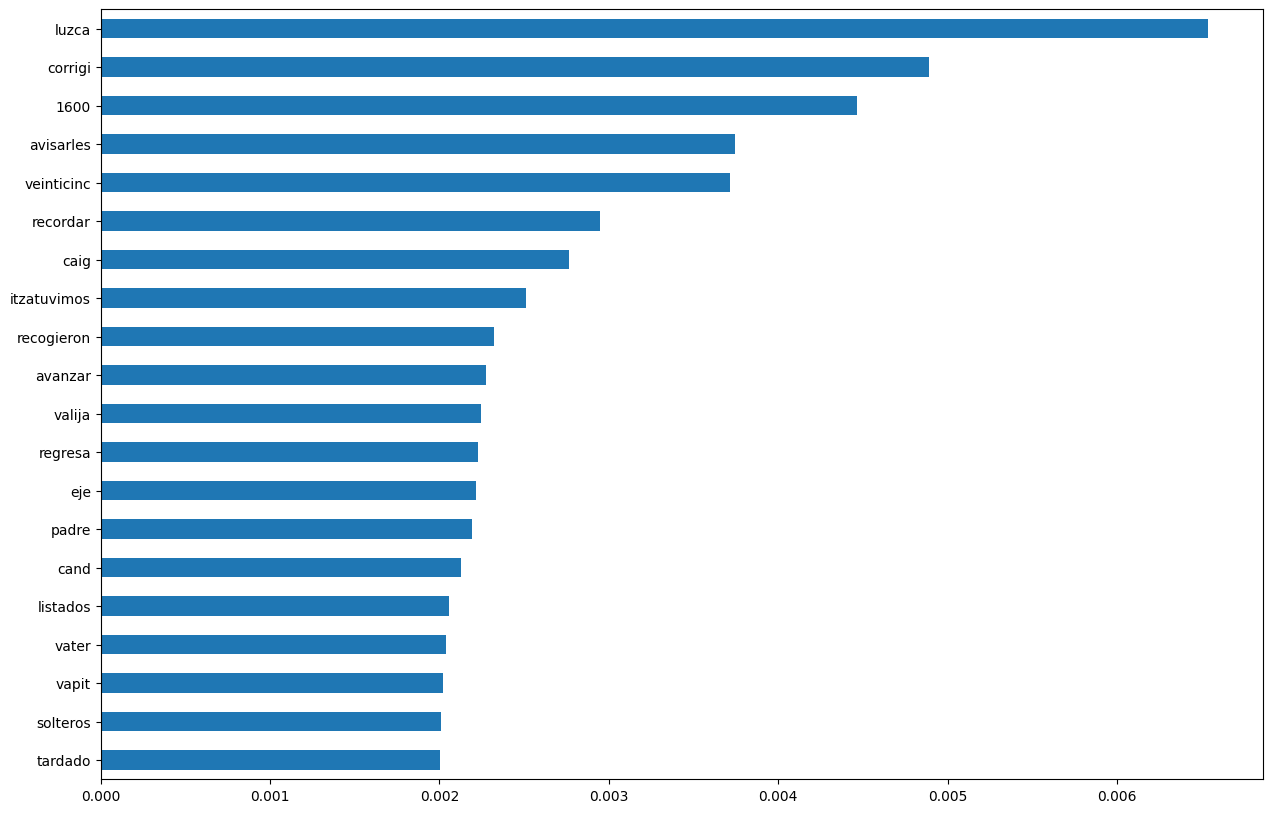

In [25]:
# Feature importance in tree models is an indicator on how relevant is a feature for taking the decision by the model
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

Se realiza una descripción gráfica de la importancia de las palabras en el modelo de clasificación Random Forest Classifier. Se puede observar que las palabras con mayor importancia son 'objetivo', 'pavimento' y 'sucursales'.

In [26]:
bow_estimators = bow_model.estimators_
print("Number of trees:", len(bow_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 264.73


In [27]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test["words"]))

#### **Evaluación Cuantitativa**


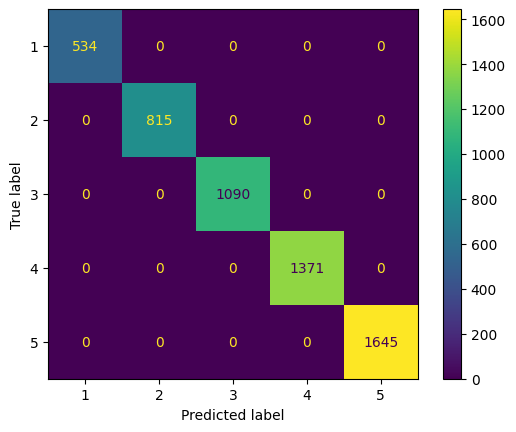

In [28]:
ConfusionMatrixDisplay.from_predictions(Y_train_BoW, y_train_bow_predict)

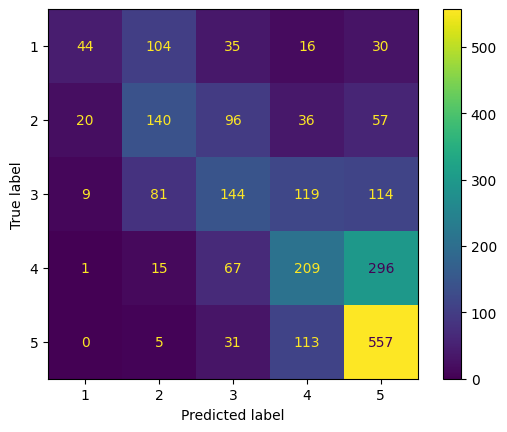

In [29]:
ConfusionMatrixDisplay.from_predictions(Y_test_BoW, y_test_bow_predict)

Se observan las predicciones realizadas por el modelo para las reseñas de prueba. Hay un margen de error considerable en todos los ratings.

Está cometiendo errores significativos en las reseñas con calificación 1, pues las predice en su mayoría como calificación 2. Lo mismo ocurre con las reseñas con calificación 4, pues las predice en su mayoría como calificación 5.

El modelo destaca notablemente en la predicción de reseñas con calificación 5.

__Métricas Conjunto Entrenamiento:__

Recordemos que:

__Exactitud:__ Proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.

__Recall:__ Proporción de casos positivos que fueron correctamente identificados por el modelo.

__Precisión:__ Proporción de casos positivos identificados correctamente por el modelo sobre el total de casos identificados como positivos.

__F1:__ Media geométrica entre precisión y recall.

In [30]:
print('Exactitud sobre Train: %.2f' % accuracy_score(Y_train_BoW, y_train_bow_predict))
print("Precision:", precision_score(Y_train_BoW, y_train_bow_predict, average='weighted'))
print("Recall:", recall_score(Y_train_BoW, y_train_bow_predict, average='weighted'))
print("F1:", f1_score(Y_train_BoW, y_train_bow_predict, average='weighted'))

Exactitud sobre Train: 1.00
Precision: 1.0
Recall: 1.0
F1: 1.0


__Métricas Conjunto Test__

In [31]:
print('Exactitud sobre Test: %.2f' % accuracy_score(Y_test_BoW, y_test_bow_predict))
print("Precision:", precision_score(Y_test_BoW, y_test_bow_predict,average='weighted'))
print("Recall:", recall_score(Y_test_BoW, y_test_bow_predict,average='weighted'))
print("F1:", f1_score(Y_test_BoW, y_test_bow_predict,average='weighted'))

Exactitud sobre Test: 0.47
Precision: 0.4619254404171122
Recall: 0.4677212483967507
F1: 0.44534528200116763


El modelo no es bueno, ya que todas sus métricas son bajas. La exactitud del modelo es de 0.45, por lo que el modelo acierta en el 45% de los casos. 


#### **4.1.1. BoW con clasificación Regresión Logística**


Exactitud (Regresión Logística):  0.45318512184694315
Precision (Regresión Logística: 0.4508948761239581
Recall (Regresión Logística: 0.45318512184694315
F1 (Regresión Logística: 0.45062792324374373


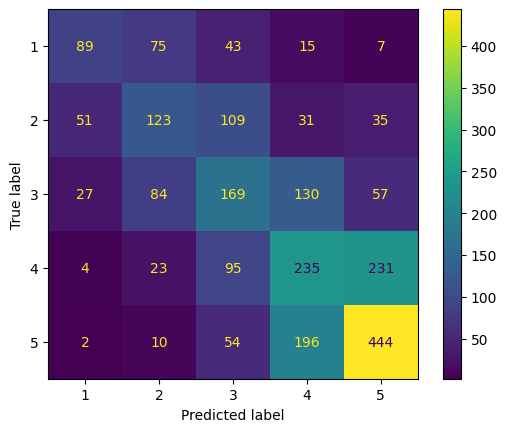

In [32]:

logistic_model = LogisticRegression(random_state=5, max_iter=1000)

logistic_model.fit(X_bow, Y_train_BoW)

# Realiza predicciones en los datos de prueba
y_test_logistic_predict = logistic_model.predict(bow.transform(X_test["words"]))

# Calcula las métricas de evaluación
exactitud_logistic = accuracy_score(Y_test_BoW, y_test_logistic_predict)
precision_logistic = precision_score(Y_test_BoW, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(Y_test_BoW, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(Y_test_BoW, y_test_logistic_predict, average='weighted')

ConfusionMatrixDisplay.from_predictions(Y_test_BoW, y_test_logistic_predict)

print ('Exactitud (Regresión Logística): ', exactitud_logistic)
print("Precision (Regresión Logística:", precision_logistic)
print("Recall (Regresión Logística:", recall_logistic)
print("F1 (Regresión Logística:", f1_logistic)


#### **4.1.1. BoW con clasificación SVM**


Exactitud (SVM):  0.42625053441641725
Precision (SVM): 0.4313336885050454
Recall (SVM): 0.42625053441641725
F1 (SVM): 0.4283342849117564


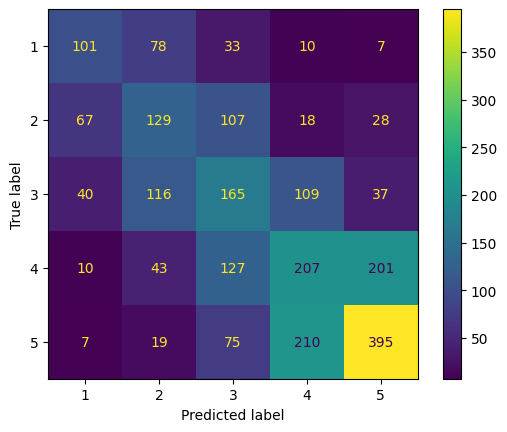

In [33]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

svm_model.fit(X_bow, Y_train_BoW)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(bow.transform(X_test["words"]))

# Calcula las métricas de evaluación
exactitud_svm = accuracy_score(Y_test_BoW, y_test_svm_predict)
precision_svm = precision_score(Y_test_BoW, y_test_svm_predict, average='weighted')
recall_svm = recall_score(Y_test_BoW, y_test_svm_predict, average='weighted')
f1_svm = f1_score(Y_test_BoW, y_test_svm_predict, average='weighted')

ConfusionMatrixDisplay.from_predictions(Y_test_BoW, y_test_svm_predict)

print ('Exactitud (SVM): ', exactitud_svm)
print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

#### 4.2 Modelos con Vectorizacion TFIDF

#### 4.3 Modelos con Vectorizacion Doc2Vec 

In [34]:
X_train_d2v, X_test_d2v, y_train_d2v, y_test_d2v = X_train, X_test, y_train, y_test

In [35]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
def tokenize_and_tag(texts):
    tagged_data = []
    for i, text in enumerate(texts):
        words = word_tokenize(text)
        tags = [i]
        tagged_data.append(TaggedDocument(words=words, tags=tags))
    return tagged_data

# Tokeniza y etiqueta los textos de entrenamiento y prueba
tagged_data_train = tokenize_and_tag(X_train["words"])
tagged_data_test = tokenize_and_tag(X_test["words"])
# Crea un modelo Doc2Vec
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)

# Construye el vocabulario
doc2vec_model.build_vocab(tagged_data_train)

# Entrena el modelo Doc2Vec
doc2vec_model.train(tagged_data_train, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)
# Vectoriza los textos de entrenamiento y prue ba
X_train_d2v['doc2vec_features'] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_train]
X_test_d2v['doc2vec_features'] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_test]

##### 4.3.1 Clasificacion Random Forest Classifier

In [36]:
# Modelo con Doc2Vec
doc2vec_model = RandomForestClassifier(random_state=5)
doc2vec_model.fit(list(X_train_d2v['doc2vec_features']), y_train_d2v)
y_train_doc2vec_predict = doc2vec_model.predict(list(X_train_d2v['doc2vec_features']))
y_test_doc2vec_predict = doc2vec_model.predict(list(X_test_d2v['doc2vec_features']))


Precision: 0.404885874461248
Recall: 0.41299700726806327
F1: 0.40067003217189345


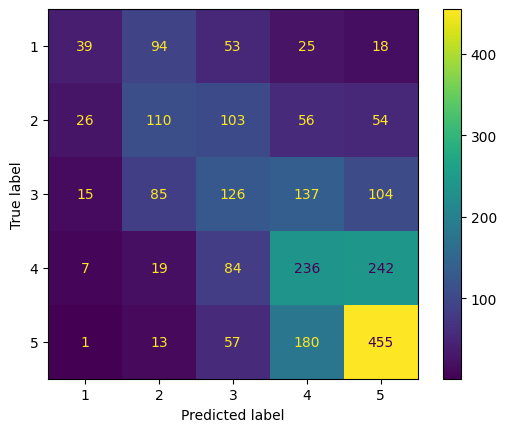

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_doc2vec_predict)
from sklearn.metrics import precision_score,recall_score,f1_score
precision_doc2vec = precision_score(y_test, y_test_doc2vec_predict, average='weighted')
recall_doc2vec = recall_score(y_test, y_test_doc2vec_predict, average='weighted')
f1_doc2vec = f1_score(y_test, y_test_doc2vec_predict, average='weighted')

print("Precision:", precision_doc2vec)
print("Recall:", recall_doc2vec)
print("F1:", f1_doc2vec)

##### 4.3.2 Doc2Vec Regresion Logisitca

In [38]:
from sklearn.linear_model import LogisticRegression
# Crea un modelo de Regresión Logística
logistic_model = LogisticRegression(random_state=5, max_iter=1000)

# Entrena el modelo con los vectores de características generados por Doc2Vec
logistic_model.fit(list(X_train_d2v['doc2vec_features']), y_train)

# Realiza predicciones en los datos de prueba
y_test_logistic_predict = logistic_model.predict(list(X_test_d2v['doc2vec_features']))

# Calcula las métricas de evaluación
precision_logistic = precision_score(y_test, y_test_logistic_predict, average='weighted')
recall_logistic = recall_score(y_test, y_test_logistic_predict, average='weighted')
f1_logistic = f1_score(y_test, y_test_logistic_predict, average='weighted')

print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1:", f1_logistic)

Precision: 0.43135116728672485
Recall: 0.4429243266353142
F1: 0.43192977067104027


##### 4.3.3 Doc2Vec SVM

In [39]:
# Crea un modelo de Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=5)

# Entrena el modelo con los vectores de características generados por Doc2Vec
svm_model.fit(list(X_train_d2v['doc2vec_features']), y_train)

# Realiza predicciones en los datos de prueba
y_test_svm_predict = svm_model.predict(list(X_test_d2v['doc2vec_features']))

# Calcula las métricas de evaluación
precision_svm = precision_score(y_test, y_test_svm_predict, average='weighted')
recall_svm = recall_score(y_test, y_test_svm_predict, average='weighted')
f1_svm = f1_score(y_test, y_test_svm_predict, average='weighted')

print("Precision (SVM):", precision_svm)
print("Recall (SVM):", recall_svm)
print("F1 (SVM):", f1_svm)

Precision (SVM): 0.43356653059097483
Recall (SVM): 0.44548952543822146
F1 (SVM): 0.4340336732454478
